# **Finding Lane Lines on the Road** 

### **Goal**
piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).

<figure>
 <img src="examples/line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Output look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>
___
### **Tools**
- color selection
- region of interest selection
- grayscaling
- Gaussian smoothing
- Canny Edge Detection
- Hough Tranform line detection

## Import Packages

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


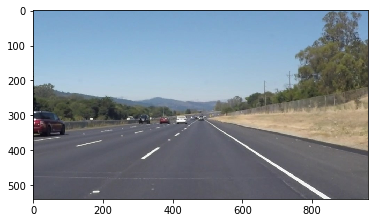

In [2]:
image = mpimg.imread('test_images/solidWhiteRight.jpg')

print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)
#plt.imshow(gray, cmap='gray')

## Ideas for Lane Detection Pipeline

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images  
`cv2.cvtColor()` to grayscale or change color  
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

## Helper Functions

In [3]:
import math

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)


def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)


def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    
    if len(img.shape) > 2:
        channel_count = img.shape[3]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=3):
    slopes = []
    for line in lines:
        for x1,y1,x2,y2 in line:
            slope = (y1-y2)/(x2-x1)
            if abs(slope) > 0.2 and abs(slope) < 0.6:
                continue;
            print(x1, y1, x2, y2, slope)
            slopes.append(slope)
            
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)
    left = np.average(np.array([s for s in slopes if s > 0]))
    right = np.average(np.array([s for s in slopes if s < 0]))
    print(left)
    print(right)
    
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    """
    initial_img * α + img * β + γ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, γ)

## Test Images

Build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [4]:
import os
os.listdir("test_images/")

['solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

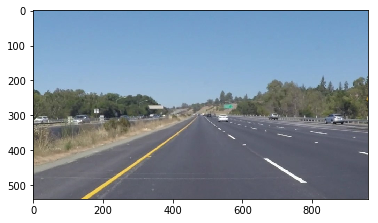

In [5]:
image = mpimg.imread('test_images/solidYellowLeft.jpg')
plt.imshow(image)

## Build a Lane Finding Pipeline



Build the pipeline and run your solution on all test_images. Make copies into the `test_images_output` directory, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.

138 539 438 336 0.6766666666666666
199 510 422 348 0.726457399103139
138 538 443 332 0.6754098360655738
158 539 435 338 0.7256317689530686
559 358 767 493 -0.6490384615384616
530 338 769 493 -0.6485355648535565
0.701041417697112
-0.648787013196009


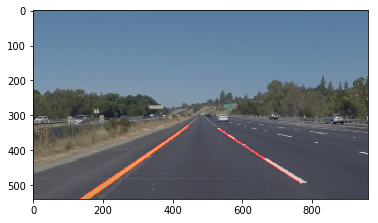

In [6]:
imshape = image.shape
c_vertical = imshape[0] / 2 + 45
c_horizontal = imshape[1] / 2
vertices = np.array([[(0,imshape[0]),(c_horizontal, c_vertical), (c_horizontal, c_vertical), (imshape[1],imshape[0])]], dtype=np.int32)

img = grayscale(image)
img = gaussian_blur(img, 3)
img = canny(img, 50, 150)
img = region_of_interest(img, vertices)
img = hough_lines(img, 1, np.pi/180, 70, 80, 180)
img = weighted_img(img, image)

plt.imshow(img, cmap='gray')

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an import error when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel). Still have problems? Try relaunching Jupyter Notebook from the terminal prompt. Also, consult the forums for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://discussions.udacity.com/t/project-error-of-test-on-videos/274082) for more troubleshooting tips across operating systems.**

In [7]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [8]:
def process_image(image):
    imshape = image.shape
    c_vertical = imshape[0] / 2 + 45
    c_horizontal = imshape[1] / 2
    vertices = np.array([[(0,imshape[0]),(c_horizontal, c_vertical), (c_horizontal, c_vertical), (imshape[1],imshape[0])]], dtype=np.int32)
    
    img = grayscale(image)
    img = gaussian_blur(img, 3)
    img = canny(img, 50, 150)
    img = region_of_interest(img, vertices)
    img = hough_lines(img, 1, np.pi/180, 70, 80, 180)
    img = weighted_img(img, image)

    return img

Let's try the one with the solid white lane on the right first ...

In [9]:
white_output = 'test_videos_output/solidWhiteRight.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
#clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

560 352 870 538 -0.6
574 364 763 486 -0.6455026455026455
557 351 846 538 -0.6470588235294118
187 513 415 347 0.7280701754385965
200 515 443 332 0.7530864197530864
574 361 870 539 -0.6013513513513513
201 515 446 331 0.7510204081632653
532 339 689 437 -0.6242038216560509
0.7440590011183161
-0.6236233284078919
[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4


  0%|                                                                                          | 0/222 [00:00<?, ?it/s]

560 352 870 538 -0.6
574 364 763 486 -0.6455026455026455
557 351 846 538 -0.6470588235294118
187 513 415 347 0.7280701754385965
200 515 443 332 0.7530864197530864
574 361 870 539 -0.6013513513513513
201 515 446 331 0.7510204081632653
532 339 689 437 -0.6242038216560509
0.7440590011183161
-0.6236233284078919
555 350 868 538 -0.6006389776357828
598 379 844 538 -0.6463414634146342
560 352 748 465 -0.601063829787234
170 538 445 331 0.7527272727272727
151 539 349 395 0.7272727272727273
638 404 846 539 -0.6490384615384616
578 367 770 491 -0.6458333333333334
170 539 445 332 0.7527272727272727
0.7442424242424241
-0.6285832131418891
555 350 868 538 -0.6006389776357828
530 338 755 479 -0.6266666666666667
560 352 788 489 -0.6008771929824561
170 539 444 332 0.7554744525547445
150 538 248 467 0.7244897959183674
563 355 846 539 -0.6501766784452296
0.739982124236556
-0.6195898789325338
555 350 868 538 -0.6006389776357828
530 338 766 486 -0.6271186440677966
690 439 844 536 -0.6298701298701299
560 352 

  2%|█▍                                                                                | 4/222 [00:00<00:07, 30.38it/s]

541 345 849 538 -0.6266233766233766
557 351 870 539 -0.6006389776357828
534 340 707 448 -0.6242774566473989
714 454 848 538 -0.6268656716417911
nan
-0.6196013706370873
560 352 870 538 -0.6
536 341 736 466 -0.625
534 340 765 485 -0.6277056277056277
758 482 848 539 -0.6333333333333333
nan
-0.6215097402597403
560 352 871 539 -0.6012861736334405
564 359 846 536 -0.6276595744680851
536 341 790 500 -0.6259842519685039
667 415 835 516 -0.6011904761904762
nan
-0.6140301190651264
560 352 795 493 -0.6
572 364 850 538 -0.6258992805755396
536 341 851 538 -0.6253968253968254
568 356 873 539 -0.6
nan
-0.6128240264930912
560 352 871 539 -0.6012861736334405
559 356 849 538 -0.6275862068965518
559 352 869 538 -0.6
599 382 848 538 -0.6265060240963856
181 524 440 336 0.7258687258687259
161 527 426 341 0.7018867924528301
0.713877759160778
-0.6138446011565946


  4%|███▎                                                                              | 9/222 [00:00<00:06, 32.58it/s]

565 358 866 539 -0.6013289036544851
545 345 866 538 -0.6012461059190031
620 398 844 538 -0.625
576 369 767 489 -0.6282722513089005
517 332 613 392 -0.625
289 439 436 336 0.7006802721088435
296 441 448 331 0.7236842105263158
0.7121822413175797
-0.6161694521764778
514 331 737 475 -0.6457399103139013
742 478 838 538 -0.625
272 461 462 323 0.7263157894736842
263 459 446 331 0.6994535519125683
618 399 820 526 -0.6287128712871287
528 337 810 507 -0.6028368794326241
263 458 432 340 0.6982248520710059
0.7079980644857528
-0.6255724152584136
510 329 831 537 -0.6479750778816199
510 330 856 538 -0.6011560693641619
504 326 738 478 -0.6495726495726496
229 483 448 330 0.6986301369863014
239 485 462 323 0.726457399103139
525 336 728 462 -0.6206896551724138
245 483 443 334 0.7525252525252525
0.725870929538231
-0.6298483629977113


  5%|████▍                                                                            | 12/222 [00:00<00:06, 30.34it/s]

510 329 833 538 -0.6470588235294118
527 337 757 480 -0.6217391304347826
523 338 814 527 -0.6494845360824743
534 340 825 521 -0.6219931271477663
199 515 441 333 0.7520661157024794
183 514 443 332 0.7
183 513 400 361 0.7004608294930875
771 487 855 539 -0.6190476190476191
0.7175089817318557
-0.6318646472484108
542 344 854 538 -0.6217948717948718
649 419 832 538 -0.6502732240437158
144 538 425 342 0.697508896797153
521 335 834 539 -0.6517571884984026
584 371 781 494 -0.6243654822335025
164 539 428 340 0.7537878787878788
519 333 648 417 -0.6511627906976745
538 342 814 514 -0.6231884057971014
0.725648387792516
-0.6370903271775448
549 347 857 539 -0.6233766233766234
650 418 835 538 -0.6486486486486487
161 538 411 350 0.752
528 337 645 413 -0.6495726495726496
141 538 393 362 0.6984126984126984
585 370 816 514 -0.6233766233766234
527 337 696 447 -0.650887573964497
164 537 428 339 0.75
0.7334708994708995
-0.6391724237878085


  7%|█████▍                                                                           | 15/222 [00:00<00:07, 28.22it/s]

560 352 859 539 -0.6254180602006689
548 347 767 494 -0.6712328767123288
634 404 807 520 -0.6705202312138728
157 538 428 341 0.7269372693726938
138 538 321 410 0.6994535519125683
0.713195410642631
-0.6557237227089568
564 354 859 538 -0.6237288135593221
552 349 746 479 -0.6701030927835051
664 423 837 539 -0.6705202312138728
605 380 859 539 -0.6259842519685039
nan
-0.647584097381301
560 352 858 538 -0.6241610738255033
613 390 822 530 -0.6698564593301436
554 351 736 473 -0.6703296703296703
705 451 836 539 -0.6717557251908397
nan
-0.6590257321690391
551 348 856 538 -0.6229508196721312
629 402 811 524 -0.6703296703296703
566 360 719 463 -0.673202614379085
549 347 834 539 -0.6736842105263158
542 345 638 409 -0.6666666666666666
nan
-0.6613667963147738


  9%|██████▉                                                                          | 19/222 [00:00<00:06, 29.60it/s]

544 345 855 539 -0.6237942122186495
521 334 784 505 -0.6501901140684411
549 347 855 538 -0.6241830065359477
625 402 833 538 -0.6538461538461539
nan
-0.638003371667298
544 345 854 538 -0.6225806451612903
536 341 853 539 -0.6246056782334385
517 332 793 512 -0.6521739130434783
642 414 832 538 -0.6526315789473685
523 335 623 400 -0.65
164 522 447 331 0.6749116607773852
186 521 449 330 0.7262357414448669
0.700573701111126
-0.6403983630771151
536 341 854 539 -0.6226415094339622
517 332 824 532 -0.6514657980456026
657 424 833 539 -0.6534090909090909
560 355 853 538 -0.6245733788395904
521 334 650 418 -0.6511627906976745
301 439 448 332 0.7278911564625851
289 437 448 330 0.6729559748427673
0.7004235656526762
-0.6406505135851841
544 345 854 538 -0.6225806451612903
526 338 833 538 -0.6514657980456026
538 342 854 539 -0.6234177215189873
519 333 679 437 -0.65
671 433 833 539 -0.654320987654321
264 454 447 331 0.6721311475409836
275 457 454 327 0.7262569832402235
0.6991940653906035
-0.6403570304760

 10%|████████▍                                                                        | 23/222 [00:00<00:06, 30.03it/s]

542 344 854 539 -0.625
660 425 833 538 -0.653179190751445
523 335 719 463 -0.6530612244897959
244 479 447 331 0.729064039408867
233 475 446 331 0.676056338028169
568 359 853 537 -0.624561403508772
0.702560188718518
-0.6389504546875032
544 345 855 539 -0.6237942122186495
572 361 854 537 -0.624113475177305
525 336 729 469 -0.6519607843137255
203 509 433 342 0.7260869565217392
665 428 834 538 -0.650887573964497
186 507 446 331 0.676923076923077
528 337 672 431 -0.6527777777777778
547 346 855 538 -0.6233766233766234
187 507 434 341 0.6720647773279352
0.6916916035909172
-0.6378184078047631
545 345 854 538 -0.6245954692556634
527 337 737 474 -0.6523809523809524
163 538 433 342 0.725925925925926
140 539 432 342 0.6746575342465754
664 427 832 537 -0.6547619047619048
140 538 445 332 0.6754098360655738
744 480 833 538 -0.651685393258427
0.6919977654126918
-0.6458559299142368


 12%|█████████▍                                                                       | 26/222 [00:00<00:06, 28.43it/s]

545 345 855 538 -0.6225806451612903
525 336 725 466 -0.65
723 466 833 538 -0.6545454545454545
164 538 432 343 0.7276119402985075
142 539 429 345 0.6759581881533101
542 344 855 539 -0.6230031948881789
532 341 799 515 -0.651685393258427
0.7017850642259088
-0.6403629375706702
547 346 855 538 -0.6233766233766234
534 342 833 537 -0.6521739130434783
545 345 855 539 -0.6258064516129033
164 539 334 415 0.7294117647058823
142 539 429 345 0.6759581881533101
0.7026849764295962
-0.6337856626776683
544 345 855 539 -0.6237942122186495
531 340 799 515 -0.6529850746268657
552 349 856 538 -0.6217105263157895
680 438 834 538 -0.6493506493506493
nan
-0.6369601156279885
549 347 857 539 -0.6233766233766234
546 350 835 538 -0.6505190311418685
545 345 792 499 -0.6234817813765182
529 338 799 514 -0.6518518518518519
nan
-0.6373073219367155


 14%|██████████▉                                                                      | 30/222 [00:00<00:06, 30.10it/s]

551 348 857 539 -0.6241830065359477
547 350 836 538 -0.6505190311418685
528 337 795 511 -0.651685393258427
639 402 858 538 -0.6210045662100456
nan
-0.6368479992865722
550 352 837 539 -0.6515679442508711
533 340 837 538 -0.6513157894736842
549 347 832 523 -0.6219081272084805
678 426 858 538 -0.6222222222222222
nan
-0.6367535207888145
539 344 837 538 -0.6510067114093959
549 347 845 531 -0.6216216216216216
660 415 858 538 -0.6212121212121212
567 363 836 538 -0.6505576208178439
nan
-0.6360995187652456
565 362 836 538 -0.6494464944649446
549 347 845 531 -0.6216216216216216
530 338 834 536 -0.6513157894736842
559 354 676 427 -0.6239316239316239
745 468 858 538 -0.6194690265486725
292 436 431 338 0.7050359712230215
304 436 437 336 0.7518796992481203
0.7284578352355708
-0.6331569112081094


 15%|████████████▍                                                                    | 34/222 [00:01<00:05, 31.99it/s]

553 355 834 538 -0.6512455516014235
545 345 856 539 -0.6237942122186495
561 356 726 459 -0.6242424242424243
530 339 812 523 -0.6524822695035462
278 455 436 336 0.7531645569620253
267 452 448 330 0.6740331491712708
0.713598853066648
-0.6379411143915108
548 348 830 524 -0.624113475177305
573 369 833 538 -0.65
542 344 855 539 -0.6230031948881789
557 358 832 537 -0.6509090909090909
237 475 433 338 0.6989795918367347
247 478 412 358 0.7272727272727273
0.713126159554731
-0.6370064402436437
548 348 820 518 -0.625
579 373 833 538 -0.6496062992125984
192 506 431 339 0.698744769874477
548 352 834 538 -0.6503496503496503
767 484 855 538 -0.6136363636363636
205 509 368 391 0.7239263803680982
192 508 433 339 0.7012448132780082
542 344 855 539 -0.6230031948881789
0.7079719878401945
-0.6323191016173583
561 356 854 539 -0.6245733788395904
611 394 833 539 -0.6531531531531531
146 538 431 339 0.6982456140350877
545 345 854 538 -0.6245954692556634
569 366 833 538 -0.6515151515151515
167 539 441 333 0.7518

 17%|█████████████▊                                                                   | 38/222 [00:01<00:05, 30.91it/s]

559 354 854 539 -0.6271186440677966
585 376 834 538 -0.6506024096385542
642 414 832 538 -0.6526315789473685
144 539 429 340 0.6982456140350877
166 538 415 351 0.751004016064257
560 359 676 435 -0.6551724137931034
193 519 441 333 0.75
0.7330832100331149
-0.6463812616117057
566 358 855 539 -0.6262975778546713
534 340 738 477 -0.6715686274509803
538 342 769 497 -0.670995670995671
146 537 428 340 0.6985815602836879
742 478 833 539 -0.6703296703296703
164 538 382 379 0.7293577981651376
0.7139696792244128
-0.6597978866577482
567 358 855 538 -0.625
672 433 833 538 -0.6521739130434783
536 341 697 449 -0.6708074534161491
540 343 772 499 -0.6724137931034483
nan
-0.655098789890769
557 351 638 402 -0.6296296296296297
542 344 854 538 -0.6217948717948718
538 342 784 507 -0.6707317073170732
572 361 855 538 -0.6254416961130742
559 355 833 539 -0.6715328467153284
536 341 699 451 -0.6748466257668712
nan
-0.6489962295561414


 19%|███████████████▎                                                                 | 42/222 [00:01<00:05, 31.55it/s]

544 345 854 538 -0.6225806451612903
550 349 832 539 -0.6737588652482269
542 345 747 483 -0.6731707317073171
583 368 853 537 -0.6259259259259259
540 343 766 495 -0.672566371681416
nan
-0.6536005079448353
540 343 799 517 -0.6718146718146718
546 346 855 539 -0.6245954692556634
588 371 855 538 -0.6254681647940075
551 351 699 451 -0.6756756756756757
561 356 833 539 -0.6727941176470589
nan
-0.6540696198374155
536 341 792 513 -0.671875
586 370 854 538 -0.6268656716417911
542 344 827 536 -0.6736842105263158
nan
-0.6574749607227023
538 342 773 500 -0.6723404255319149
593 374 855 538 -0.6259541984732825
633 400 855 539 -0.6261261261261262
544 345 828 536 -0.6725352112676056
295 433 412 348 0.7264957264957265
0.7264957264957265
-0.6492389903497323


 21%|████████████████▊                                                                | 46/222 [00:01<00:05, 32.72it/s]

538 342 757 489 -0.6712328767123288
598 377 855 538 -0.6264591439688716
717 461 833 539 -0.6724137931034483
544 345 855 539

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



339 0.6294117647058823
0.6640648567119155
-0.6579471688984628
517 332 822 538 -0.6754098360655738
626 398 844 539 -0.6467889908256881
515 331 820 537 -0.6754098360655738
534 340 660 421 -0.6428571428571429
230 467 424 341 0.6494845360824743
241 470 426 341 0.6972972972972973
0.6733909166898857
-0.6601164514534946
513 330 821 538 -0.6753246753246753
575 366 841 538 -0.6466165413533834
202 498 430 339 0.6973684210526315
517 332 748 488 -0.6753246753246753
187 496 430 338 0.6502057613168725
201 498 387 368 0.6989247311827957
189 494 415 347 0.6504424778761062
530 338 662 423 -0.6439393939393939
0.6742353478571015
-0.660301321485532
513 330 821 538 -0.6753246753246753
619 403 820 539 -0.6766169154228856
652 416 842 539 -0.6473684210526316
127 536 428 340 0.6511627906976745
529 338 648 415 -0.6470588235294118
174 518 426 342 0.6984126984126984
515 332 820 538 -0.6754098360655738
144 538 427 340 0.6996466431095406
0.6830740440733045
-0.6643557342790356


 33%|███████████████████████████                                                      | 74/222 [00:02<00:04, 30.41it/s]

518 334 820 538 -0.6754966887417219
530 338 793 508 -0.6463878326996197
123 538 426 342 0.6468646864686468
142 539 426 340 0.7007042253521126
686 438 841 538 -0.6451612903225806
0.6737844559103797
-0.6556819372546406
534 340 841 539 -0.6482084690553745
530 338 757 485 -0.6475770925110133
530 342 818 537 -0.6770833333333334
120 539 425 341 0.6491803278688525
139 538 221 483 0.6707317073170732
0.6599560175929629
-0.6576229649665737
530 338 840 539 -0.6483870967741936
549 355 819 538 -0.6777777777777778
668 437 819 539 -0.6754966887417219
517 332 655 428 -0.6956521739130435
nan
-0.6743284343016842
530 338 839 539 -0.6504854368932039
522 335 736 484 -0.6962616822429907
669 438 818 539 -0.6778523489932886
nan
-0.6748664893764943


 35%|████████████████████████████▍                                                    | 78/222 [00:02<00:04, 31.85it/s]

536 343 837 539 -0.6511627906976745
519 333 788 521 -0.6988847583643123
515 331 734 484 -0.6986301369863014
528 337 837 538 -0.6504854368932039
693 454 812 537 -0.6974789915966386
650 418 827 533 -0.6497175141242938
nan
-0.6743932714437375
519 333 835 538 -0.6487341772151899
515 331 751 496 -0.6991525423728814
517 332 812 538 -0.6983050847457627
654 421 835 539 -0.6519337016574586
528 337 643 412 -0.6521739130434783
nan
-0.6700598838069542
517 332 813 539 -0.6993243243243243
549 352 835 538 -0.6503496503496503
515 331 758 501 -0.6995884773662552
528 337 667 428 -0.6546762589928058
178 508 432 337 0.6732283464566929
0.6732283464566929
-0.6759846777582589
515 331 811 538 -0.6993243243243243
529 340 834 538 -0.6491803278688525
519 333 830 535 -0.6495176848874598
291 432 432 337 0.6737588652482269
283 430 408 349 0.648
0.6608794326241134
-0.6660074456935455
519 334 810 538 -0.7010309278350515
518 333 833 538 -0.6507936507936508
538 344 708 455 -0.6529411764705882
517 332 812 538 -0.6983050

 37%|██████████████████████████████▎                                                  | 83/222 [00:02<00:04, 33.27it/s]

517 332 811 538 -0.7006802721088435
519 333 777 501 -0.6511627906976745
236 469 430 338 0.6752577319587629
225 467 431 338 0.6262135922330098
529 340 810 537 -0.701067615658363
618 396 787 509 -0.6686390532544378
0.6507356620958864
-0.6803874329298297
517 332 811 538 -0.7006802721088435
519 333 809 522 -0.6517241379310345
182 496 413 346 0.6493506493506493
521 334 704 453 -0.6502732240437158
197 497 429 340 0.6767241379310345
193 498 429 339 0.673728813559322
533 343 833 538 -0.65
0.6666012002803353
-0.6631694085208985
520 334 811 538 -0.7010309278350515
122 535 408 349 0.6503496503496503
139 536 428 341 0.6747404844290658
529 340 833 538 -0.6513157894736842
551 357 808 537 -0.7003891050583657
519 333 733 472 -0.6495327102803738
0.662545067389358
-0.6755671331618689
536 346 810 538 -0.7007299270072993
520 334 799 516 -0.6523297491039427
116 539 405 351 0.6505190311418685
136 538 427 341 0.6769759450171822
124 534 418 344 0.6462585034013606
532 343 832 538 -0.65
519 333 693 446 -0.64942

 39%|███████████████████████████████▋                                                 | 87/222 [00:02<00:04, 32.27it/s]

533 344 810 538 -0.7003610108303249
517 332 776 501 -0.6525096525096525
532 343 831 538 -0.6521739130434783
118 539 420 343 0.6490066225165563
137 538 439 334 0.6754966887417219
0.6622516556291391
-0.6683481921278185
584 381 809 539 -0.7022222222222222
532 339 762 494 -0.6739130434782609
540 349 809 538 -0.7026022304832714
534 340 812 527 -0.6726618705035972
118 539 418 344 0.65
695 448 830 539 -0.674074074074074
0.65
-0.6850946881522851
572 372 809 538 -0.70042194092827
534 340 794 515 -0.6730769230769231
538 347 808 537 -0.7037037037037037
538 342 830 539 -0.6746575342465754
539 344 708 458 -0.6745562130177515
nan
-0.6852832629946447
569 370 808 538 -0.702928870292887
532 339 799 519 -0.6741573033707865
523 335 711 461 -0.6702127659574468
603 395 808 539 -0.7024390243902439
534 340 829 539 -0.6745762711864407
535 345 668 439 -0.706766917293233
nan
-0.688513525415173


 41%|█████████████████████████████████▏                                               | 91/222 [00:02<00:04, 32.14it/s]

542 346 776 504 -0.6752136752136753
594 388 808 538 -0.7009345794392523
534 340 829 539 -0.6745762711864407
542 350 695 458 -0.7058823529411765
523 335 723 469 -0.67
nan
-0.685321375756109
544 347 829 539 -0.6736842105263158
596 389 808 538 -0.7028301886792453
552 357 725 479 -0.7052023121387283
536 341 828 538 -0.6746575342465754
182 509 448 330 0.6729323308270677
706 467 808 539 -0.7058823529411765
0.6729323308270677
-0.6924513197064083
549 350 828 539 -0.6774193548387096
527 337 715 473 -0.723404255319149
609 398 808 538 -0.7035175879396985
294 433 448 330 0.6688311688311688
285 431 436 337 0.6225165562913907
0.6456738625612797
-0.701447066032519
544 345 830 538 -0.6748251748251748
559 356 830 539 -0.6752767527675276
619 404 810 538 -0.7015706806282722
560 361 740 488 -0.7055555555555556
261 447 421 343 0.65
268 449 435 337 0.6706586826347305
0.6603293413173652
-0.6893070409441326


 43%|██████████████████████████████████▋                                              | 95/222 [00:02<00:03, 34.00it/s]

538 342 831 539 -0.6723549488054608
603 391 812 538 -0.7033492822966507
547 346 832 538 -0.6736842105263158
655 429 811 539 -0.7051282051282052
239 469 435 337 0.673469387755102
231 466 420 344 0.6455026455026455
536 341 721 475 -0.7243243243243244
0.6594860166288737
-0.6957681942161914
549 347 832 538 -0.6749116607773852
626 407 813 538 -0.7005347593582888
538 342 794 514 -0.671875
190 493 425 341 0.6468085106382979
202 495 420 348 0.6743119266055045
536 341 753 498 -0.7235023041474654
617 394 832 539 -0.6744186046511628
190 492 415 346 0.6488888888888888
0.6566697753775638
-0.6890484657868604
540 343 804 534 -0.7234848484848485
575 365 831 538 -0.67578125
132 529 345 391 0.647887323943662
146 532 445 331 0.6722408026755853
538 342 757 501 -0.726027397260274
553 349 684 438 -0.6793893129770993
132 530 424 341 0.6472602739726028
0.6557961335306167
-0.7011707021805554
546 346 812 539 -0.7255639097744361
555 350 784 505 -0.6768558951965066
566 358 832 538 -0.6766917293233082
542 344 760 

 45%|████████████████████████████████████                                             | 99/222 [00:03<00:03, 32.43it/s]

545 345 810 537 -0.7245283018867924
567 358 833 538 -0.6766917293233082
687 440 833 539 -0.678082191780822
136 538 429 340 0.6757679180887372
116 539 213 476 0.6494845360824743
559 352 698 446 -0.6762589928057554
0.6626262270856057
-0.6888903039491696
544 345 812 539 -0.7238805970149254
565 357 831 537 -0.6766917293233082
542 344 739 487 -0.7258883248730964
629 401 832 538 -0.6748768472906403
nan
-0.7003343746254926
561 355 832 538 -0.6752767527675276
660 429 812 539 -0.7236842105263158
540 343 782 518 -0.7231404958677686
553 349 831 537 -0.6762589928057554
536 341 669 437 -0.7218045112781954
nan
-0.7040329926491126
563 357 832 539 -0.6765799256505576
605 392 811 537 -0.7038834951456311
564 362 744 489 -0.7055555555555556
551 348 831 537 -0.675
nan
-0.6902547440879361


 46%|█████████████████████████████████████                                           | 103/222 [00:03<00:03, 33.97it/s]

560 355 833 539 -0.673992673992674
581 375 813 538 -0.7025862068965517
528 337 676 441 -0.7027027027027027
549 347 833 538 -0.6725352112676056
212 479 460 324 0.625
0.625
-0.6879541987148835
625 406 815 539 -0.7
551 348 835 539 -0.6725352112676056
532 339 748 491 -0.7037037037037037
571 362 795 513 -0.6741071428571429
172 508 441 334 0.6468401486988847
0.6468401486988847
-0.687586514457113
588 378 816 538 -0.7017543859649122
558 352 795 512 -0.6751054852320675
560 352 836 538 -0.6739130434782609
292 431 447 330 0.6516129032258065
301 432 439 336 0.6956521739130435
542 344 700 458 -0.7215189873417721
0.673632538569425
-0.6930729755042532
582 373 817 538 -0.7021276595744681
560 352 836 538 -0.6739130434782609
636 412 817 539 -0.7016574585635359
582 368 726 465 -0.6736111111111112
268 445 438 335 0.6470588235294118
540 343 818 538 -0.7014388489208633
286 443 450 329 0.6951219512195121
0.671090387374462
-0.690549624329648


 48%|██████████████████████████████████████▌                                         | 107/222 [00:03<00:03, 34.06it/s]

561 353 785 504 -0.6741071428571429
606 390 818 539 -0.7028301886792453
562 353 839 539 -0.6714801444043321
540 343 818 538 -0.7014388489208633
249 468 447 330 0.696969696969697
240 465 420 344 0.6722222222222223
0.6845959595959596
-0.6874640812153959
613 395 818 539 -0.7024390243902439
559 352 770 494 -0.6729857819905213
197 493 448 330 0.649402390438247
560 352 828 532 -0.6716417910447762
538 342 818 538 -0.7
210 496 447 330 0.70042194092827
0.6749121656832585
-0.6867666493563853
536 341 818 538 -0.6985815602836879
557 351 782 502 -0.6711111111111111
141 531 456 326 0.6507936507936508
562 353 838 539 -0.6739130434782609
158 533 447 331 0.698961937716263
146 527 448 331 0.6490066225165563
542 344 673 436 -0.7022900763358778
0.6662540703421567
-0.6864739478022344
555 350 795 511 -0.6708333333333333
536 341 818 538 -0.6985815602836879
560 352 837 539 -0.6750902527075813
152 538 454 327 0.6986754966887417
132 539 429 339 0.6734006734006734
132 538 395 361 0.6730038022813688
530 338 817 5

 50%|████████████████████████████████████████                                        | 111/222 [00:03<00:03, 33.36it/s]

559 352 781 501 -0.6711711711711712
549 349 819 538 -0.7
536 341 818 538 -0.6985815602836879
589 371 838 539 -0.6746987951807228
133 539 427 341 0.673469387755102
154 539 234 482 0.7125
0.692984693877551
-0.6861128816588955
540 343 820 539 -0.7
594 374 825 529 -0.670995670995671
559 352 753 482 -0.6701030927835051
536 341 818 538 -0.6985815602836879
133 538 423 343 0.6724137931034483
0.6724137931034483
-0.684920081015716
543 345 821 539 -0.697841726618705
574 361 780 499 -0.6699029126213593
610 384 823 527 -0.6713615023474179
563 358 821 538 -0.6976744186046512
nan
-0.6841951400480333
572 363 823 538 -0.6972111553784861
551 349 823 539 -0.6985294117647058
624 392 843 539 -0.6712328767123288
576 361 773 493 -0.6700507614213198
nan
-0.6842560513192102


 52%|█████████████████████████████████████████▍                                      | 115/222 [00:03<00:03, 34.15it/s]

560 355 824 539 -0.696969696969697
618 388 797 508 -0.6703910614525139
667 420 844 539 -0.672316384180791
619 395 824 538 -0.697560975609756
nan
-0.6843095295531896
562 353 776 492 -0.6495327102803738
559 352 825 539 -0.7030075187969925
584 371 822 537 -0.6974789915966386
707 448 846 539 -0.6546762589928058
nan
-0.6761738699167027
560 352 846 538 -0.6503496503496503
629 402 824 538 -0.6974358974358974
569 361 753 489 -0.6956521739130435
571 358 740 468 -0.650887573964497
559 352 846 539 -0.6515679442508711
143 537 451 329 0.6753246753246753
552 350 643 413 -0.6923076923076923
0.6753246753246753
-0.6730334887036086
560 352 847 538 -0.6480836236933798
534 340 827 538 -0.6757679180887372
538 342 731 472 -0.6735751295336787
593 372 784 496 -0.6492146596858639
275 441 438 335 0.6503067484662577
285 443 423 343 0.7246376811594203
0.6874722148128389
-0.6616603327504149


 54%|██████████████████████████████████████████▉                                     | 119/222 [00:03<00:02, 34.45it/s]

534 340 817 531 -0.6749116607773852
696 439 847 537 -0.6490066225165563
559 352 847 539 -0.6493055555555556
743 482 827 539 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



862 538 -0.6125
256 471 458 325 0.7227722772277227
240 474 442 333 0.698019801980198
0.7103960396039604
-0.6345183253542569
563 359 838 538 -0.6509090909090909
559 352 826 518 -0.6217228464419475
536 341 839 538 -0.6501650165016502
740 464 861 539 -0.6198347107438017
560 353 741 466 -0.6243093922651933
219 500 464 322 0.726530612244898
199 504 441 335 0.6983471074380165
0.7124388598414573
-0.6333882113723368
559 352 859 539 -0.6233333333333333
555 350 800 503 -0.6244897959183674
534 340 838 538 -0.6513157894736842
628 402 838 539 -0.6523809523809524
168 537 464 322 0.7263513513513513
0.7263513513513513
-0.6378799677765843
557 351 859 539 -0.6225165562913907
528 337 838 538 -0.6483870967741936
534 340 688 440 -0.6493506493506493
286 445 454 327 0.7023809523809523
553 349 798 502 -0.6244897959183674
294 446 465 322 0.7251461988304093
713 458 836 538 -0.6504065040650406
0.7137635756056808
-0.6390301204799284


 64%|███████████████████████████████████████████████████▌                            | 143/222 [00:04<00:02, 31.85it/s]

559 352 859 539 -0.6233333333333333
534 340 837 537 -0.6501650165016502
719 461 838 539 -0.6554621848739496
562 353 859 538 -0.622895622895623
259 463 452 328 0.6994818652849741
269 465 460 326 0.7277486910994765
0.7136152781922254
-0.637964039401139
559 352 859 539 -0.6233333333333333
534 340 838 538 -0.6513157894736842
564 354 859 538 -0.6237288135593221
239 489 452 328 0.755868544600939
224 488 449 330 0.7022222222222222
224 489 455 327 0.7012987012987013
0.7197964893739542
-0.6327926454554466
545 345 842 538 -0.6498316498316499
648 405 862 538 -0.6214953271028038
568 356 862 539 -0.6224489795918368
175 522 449 330 0.7007299270072993
191 524 437 339 0.7520325203252033
192 523 448 330 0.75390625
579 368 840 538 -0.6513409961685823
175 523 455 327 0.7
0.7266671743331257
-0.6362792381737181
549 347 844 538 -0.6474576271186441
661 412 865 539 -0.6225490196078431
576 360 795 496 -0.6210045662100456
170 539 447 330 0.7545126353790613
179 518 445 331 0.7030075187969925
152 538 449 330 0.70

 66%|████████████████████████████████████████████████████▉                           | 147/222 [00:04<00:02, 30.82it/s]

555 350 837 533 -0.648936170212766
600 375 790 490 -0.6052631578947368
557 351 868 538 -0.6012861736334405
153 537 448 330 0.7016949152542373
170 539 447 330 0.7545126353790613
560 352 847 539 -0.6515679442508711
170 538 445 331 0.7527272727272727
0.736311607786857
-0.6267633614979535
559 352 822 522 -0.6463878326996197
601 375 800 495 -0.6030150753768844
151 538 448 330 0.7003367003367004
709 448 849 538 -0.6428571428571429
0.7003367003367004
-0.6307533503112156
579 361 869 536 -0.603448275862069
621 393 815 515 -0.6288659793814433
627 391 872 539 -0.6040816326530613
559 352 734 465 -0.6457142857142857
nan
-0.6205275434027149
596 372 872 538 -0.6014492753623188
553 349 742 471 -0.6455026455026455
560 352 798 506 -0.6470588235294118
641 400 870 538 -0.6026200873362445
746 472 850 539 -0.6442307692307693
nan
-0.628172320192278


 68%|██████████████████████████████████████████████████████▍                         | 151/222 [00:04<00:02, 31.33it/s]

551 348 797 507 -0.6463414634146342
629 393 870 538 -0.6016597510373444
681 433 848 538 -0.6287425149700598
589 368 686 427 -0.6082474226804123
264 472 464 322 0.75
0.75
-0.6212477880256126
557 351 847 539 -0.6482758620689655
583 363 818 509 -0.6212765957446809
547 346 782 498 -0.6468085106382979
553 349 868 538 -0.6
328 415 443 334 0.7043478260869566
0.7043478260869566
-0.629090242112986
560 352 848 539 -0.6493055555555556
587 365 811 504 -0.6205357142857143
761 472 869 539 -0.6203703703703703
557 351 821 522 -0.6477272727272727
174 539 460 324 0.7517482517482518
310 427 451 329 0.6950354609929078
0.7233918563705798
-0.6344847282347281
560 352 847 538 -0.6480836236933798
610 378 869 539 -0.6216216216216216
587 365 779 484 -0.6197916666666666
289 442 450 329 0.7018633540372671
572 359 848 538 -0.6485507246376812
298 445 458 325 0.75
0.7259316770186335
-0.6345119091548372


 70%|███████████████████████████████████████████████████████▊                        | 155/222 [00:04<00:02, 31.63it/s]

573 359 850 539 -0.6498194945848376
663 410 871 539 -0.6201923076923077
596 369 823 510 -0.6211453744493393
562 353 845 536 -0.6466431095406361
273 463 453 328 0.75
262 461 449 330 0.7005347593582888
0.7252673796791445
-0.6344500715667802
573 359 850 539 -0.6498194945848376
627 389 817 504 -0.6052631578947368
759 470 872 538 -0.6017699115044248
239 489 452 329 0.7511737089201878
227 486 452 328 0.7022222222222222
591 367 734 453 -0.6013986013986014
0.7266979655712049
-0.6145627913456502
621 389 853 539 -0.646551724137931
591 367 857 527 -0.6015037593984962562 357 863 538 -0.6013289036544851
540 343 864 538 -0.6018518518518519
176 539 463 323 0.7526132404181185
194 539 457 326 0.8098859315589354
176 538 436 342 0.7538461538461538
0.7721151086077359
-0.6015903777531685
544 345 821 512 -0.6028880866425993
577 366 863 538 -0.6013986013986014
175 538 456 326 0.7544483985765125
0.7544483985765125
-0.6021433440206003
551 349 864 538 -0.6038338658146964
635 401 863 538 -0.6008771929824561
nan


 79%|███████████████████████████████████████████████████████████████                 | 175/222 [00:05<00:01, 39.77it/s]

597 378 863 538 -0.6015037593984962
554 351 865 538 -0.6012861736334405
nan
-0.6013949665159684
594 376 864 539 -0.6037037037037037
232 500 452 328 0.7818181818181819
0.7818181818181819
-0.6037037037037037
563 356 863 537 -0.6033333333333334
612 387 864 539 -0.6031746031746031
205 533 467 321 0.8091603053435115
185 532 460 324 0.7563636363636363
0.7827619708535739
-0.6032539682539683
623 393 864 538 -0.6016597510373444
558 352 723 452 -0.6060606060606061
315 443 465 322 0.8066666666666666
306 441 460 325 0.7532467532467533
0.77995670995671
-0.6038601785489752
638 401 867 539 -0.6026200873362445
560 352 760 473 -0.605
282 460 450 329 0.7797619047619048
600 377 867 538 -0.602996254681648
293 461 437 340 0.8402777777777778
0.8100198412698413
-0.6035387806726308


 81%|████████████████████████████████████████████████████████████████▊               | 180/222 [00:05<00:01, 41.55it/s]

634 398 867 538 -0.6008583690987125
579 364 868 538 -0.6020761245674741
250 485 450 329 0.78
265 485 452 328 0.839572192513369
0.8097860962566845
-0.6014672468330933
573 360 869 538 -0.6013513513513513
207 518 448 330 0.7800829875518672
623 391 869 539 -0.6016260162601627
225 519 452 329 0.8370044052863436
207 519 452 328 0.7795918367346939
299 458 457 326 0.8354430379746836
0.808030566886897
-0.6014886838057569
585 367 869 538 -0.602112676056338
181 538 448 330 0.7790262172284644
674 422 859 533 -0.6
200 538 437 339 0.8396624472573839
203 537 451 329 0.8387096774193549
0.8191327806350678
-0.601056338028169
604 379 869 539 -0.6037735849056604
703 440 833 518 -0.6
181 539 448 330 0.7827715355805244
566 355 866 536 -0.6033333333333334
180 538 430 343 0.78
200 538 360 408 0.8125
0.7917571785268415
-0.6023689727463313
576 360 790 493 -0.6214953271028038
179 539 447 330 0.7798507462686567
744 464 868 539 -0.6048387096774194
200 538 445 333 0.8367346938775511
0.8082927200731038
-0.6131670183

 83%|██████████████████████████████████████████████████████████████████▋             | 185/222 [00:05<00:00, 40.41it/s]

580 362 831 518 -0.6215139442231076
700 436 863 537 -0.6196319018404908
574 359 714 446 -0.6214285714285714
nan
-0.6208581391640565
612 384 822 511 -0.6047619047619047
560 352 769 478 -0.6028708133971292
705 441 866 538 -0.6024844720496895
nan
-0.6033723967362411
609 381 870 538 -0.6015325670498084
568 356 871 538 -0.6006600660066007
nan
-0.6010963165282046
nan
nan
190 526 432 337 0.78099173553719
718 440 881 538 -0.6012269938650306
0.78099173553719
-0.6012269938650306
305 436 443 332 0.7536231884057971
315 438 443 334 0.8125
0.7830615942028986
nan


 86%|████████████████████████████████████████████████████████████████████▊           | 191/222 [00:05<00:00, 43.66it/s]

282 456 452 328 0.7529411764705882
296 457 442 335 0.8356164383561644
0.7942788074133763
nan
250 483 460 324 0.7571428571428571
263 486 467 321 0.8088235294117647
0.7829831932773109
nan
219 521 464 322 0.8122448979591836
205 518 451 332 0.7560975609756098
0.7841712294673967
nan
198 538 458 328 0.8076923076923077
177 538 464 322 0.7526132404181185
206 531 458 327 0.8095238095238095
178 538 433 346 0.7529411764705882
0.780692633526206
nan
198 539 456 330 0.810077519379845
178 539 457 328 0.7562724014336918
0.7831749604067684
nan
178 539 467 321 0.754325259515571
197 538 455 329 0.810077519379845
0.782201389447708
nan


 89%|██████████████████████████████████████████████████████████████████████▉         | 197/222 [00:05<00:00, 46.36it/s]

nan
nan
nan
nan
nan
nan
609 381 872 539 -0.6007604562737643
253 495 450 330 0.8375634517766497
0.8375634517766497
-0.6007604562737643
341 411 462 323 0.7272727272727273
0.7272727272727273
nan
636 391 868 535 -0.6206896551724138
305 440 440 335 0.7777777777777778
320 439 452 328 0.8409090909090909
0.8093434343434344
-0.6206896551724138
281 458 460 324357 398 0.7821229050279329
0.8012513702338971
nan
199 535 456 327 0.8093385214007782
175 538 456 326 0.7544483985765125
0.7818934599886453
nan
195 539 459 325 0.8106060606060606
0.8106060606060606
nan


100%|███████████████████████████████████████████████████████████████████████████████▋| 221/222 [00:06<00:00, 35.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 

Wall time: 6.41 s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [10]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [ ]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [ ]:
challenge_output = 'test_videos_output/challenge.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)
clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))